Ours (5000,)
MLE (5000,)


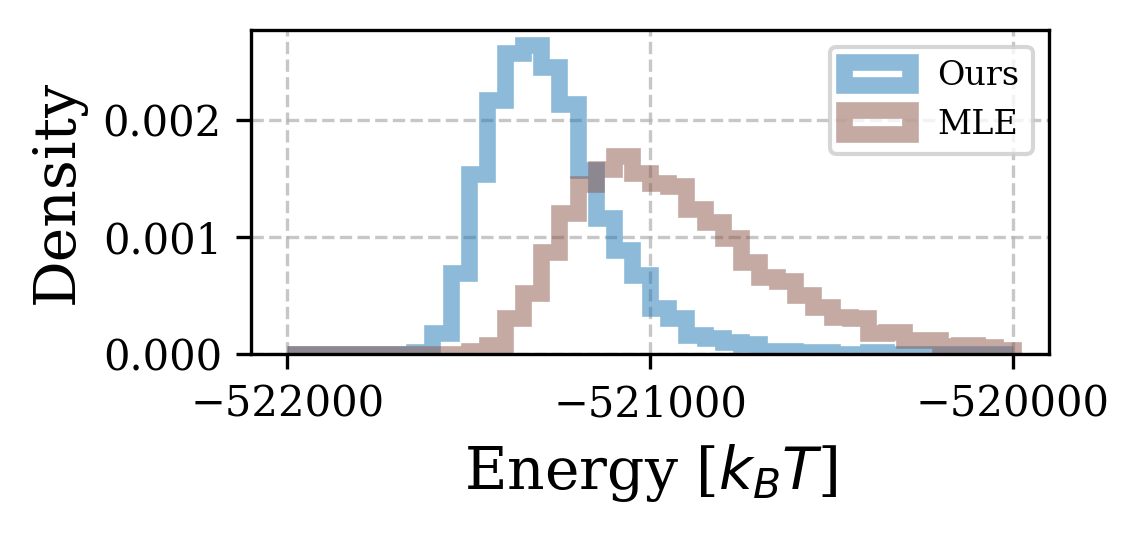

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 8,
    'figure.dpi': 300,
    'lines.linewidth': 1.5,
})

palette_dict = {
    "GT": "#808080",   # Gray
    "Ours": "#1F77B4",     # Blue
    "PIS": "#FF7F0E",     # Orange
    "iDEM": "#2CA02C",     # Green
    "TB+Expl+LS": "#9467BD",     # Purple
    "MLE": "#8C564B",     # Brown
    "FAB": "#E377C2",     # Pink
}

def plot_energy_hist(name, energy_dict, lower, upper):
    plt.figure(figsize=(4, 2))
    plt.xlabel("Energy [$k_B T$]")
    
    for method, energy in energy_dict.items():
        print(method, energy.shape)
        plt.hist(energy, range=(lower, upper), bins=40, density=True, label=method, alpha=0.5, histtype="step", linewidth=4, color=palette_dict[method])

    if name == 'aldp':
        plt.xticks([-522000, -521000, -520000]) 
        
    plt.ylabel("Density")
    plt.grid(linestyle="--", alpha=0.7)
    plt.xticks()
    plt.yticks()
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.savefig(f'../figure/{name}_energy_hist.png', format='png', bbox_inches='tight')
    plt.savefig(f'../figure/{name}_energy_hist.pdf', format='pdf', bbox_inches='tight')

# name = 'lj13'
# energy_dict = {
#     'GT': np.load(f'../assets/lj13/gt/energies.npy'),
#     'Ours': np.load('../assets/lj13/ours/energies.npy'),
#     'PIS': np.load('../assets/lj13/pis/energies.npy'),
#     'iDEM': np.load(f'../assets/lj13/idem/energies.npy'),
# }

# lower = -60
# upper = -20

# name = 'lj55'
# energy_dict = {
#     'GT': np.load(f'../assets/lj55/gt/energies.npy'),
#     'Ours': np.load('../assets/lj55/ours/energies.npy'),
#     'PIS': np.load('../assets/lj55/pis/energies.npy'),
#     'TB+Expl+LS': np.load(f'../assets/lj55/tb_expl_ls/energies.npy'),
#     # 'iDEM': np.load(f'../assets/lj55/idem/energies.npy'),
# }

# lower = -380
# upper = -100

name = 'aldp'
energy_dict = {
    # 'GT': np.load('../assets/aldp/gt/energies.npy'),
    # 'PIS': np.load(f'../assets/aldp/pis/energies.npy'),
    # 'TB+Expl+LS': np.load(f'../assets/aldp/tb_expl_ls/energies.npy'),
    'Ours': np.load('../assets/aldp/ours/energies.npy'),
    'MLE': np.load('../assets/aldp/mle/energies.npy'),
    # 'FAB': np.load(f'../assets/aldp/fab/energies.npy'),
}

lower = -522000
upper = -520000

plot_energy_hist(name, energy_dict, lower, upper)